In [5]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import json
import tweepy as tw


API_KEY = "qU3xA0HXN6G0l6rZlsTI9G2Ba"
API_SECRET_KEY = "KZsAAMWuZrfULqcq5OePEMig0v7RzdFIqd9I3ieMwqnOMRqXDw"
ACCESS_TOKEN = "1340243550898774016-qGk2inVYTV7iHhAOQbk9eZT5i4Rc94"
ACCESS_TOKEN_SECRET= "Bt4rAeLnGfXEsA7ciVVIoc9WQIg3Uw1rGiYKRwRmhsPPq"

auth = tw.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET) 
api = tw.API(auth, wait_on_rate_limit=True)


count = 50

search_query = "#INDvsAUSTest -filter:retweets"


result = tw.Cursor(api.search,
                   q=search_query,
                   since="2000-01-01").items(count)

print("starting")
tweets_copy = []
tweets_df = pd.DataFrame()
for tweet in result:
    hashtags = []

    
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text,
                                               'retweet_count': tweet.retweet_count, 
                                               'followers_count': tweet.user.followers_count,
                                               'len': len(text),
                                               'lang': tweet.lang,
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
print("done")




starting
done


In [6]:
tweets_df

,user_name,user_location,user_description,user_verified,date,text,retweet_count,followers_count,len,lang,hashtags,source
0,Mahbubnagar_Times,"Mahbubnagar, India",Follow us on social networks\nhttps://t.co/B4M...,False,2020-12-19 17:50:13,#MNT_News\n\n#INDvsAUS: Mohd #Shami suffers wr...,0,1284,157,en,"[MNT_News, INDvsAUS, Shami]",Twitter for Android
1,Faidul Hasan فیدل حسن फेदुल हसन,"Mumbai, Delhi",It Engineer\nMumbaikar\nLockdown Me Up\nMy Acc...,False,2020-12-19 17:49:07,When you wake up late and seen scorecard ........,0,55,181,en,"[INDvsAusTest, IndiavsAustralia]",Twitter for Android
2,Jaikumar S,Dubai,From UAE,False,2020-12-19 17:48:50,@bhogleharsha True #INDvsAUSTest,0,392,32,en,[INDvsAUSTest],Twitter Web App
3,Abdul Waheed 🇵🇰,"Sindh, Pakistan",Cricket Lover ❤️😎 | Lives In Beautiful Village...,False,2020-12-19 17:48:18,Only four teams have posted lower Test totals ...,0,260,94,en,[INDvsAUSTest],Twitter for Android
4,Manisha Das,"jajpur,Odisha,india",#industrialpharmacist#we make healthy possible...,False,2020-12-19 17:48:17,#INDvsAUSTest \n#match hi tha na ?🙄🙄🙄,0,536,36,tl,"[INDvsAUSTest, match]",Twitter for Android
5,Vibhor Jain,Hindustan,Mahadev Bhakt \...,False,2020-12-19 17:48:11,@WasimJaffer14 Bhai bata nahi sakht hu kitna k...,0,5,196,hi,"[India, Aussie]",Twitter Web App
6,Pooja sharma,,Mera Dil torny sa pahly ya soch Lena Bari apki...,False,2020-12-19 17:47:58,Best finisher . miss you #Dhoni\n#INDvsAUSTest...,0,117,69,en,"[Dhoni, INDvsAUSTest]",Twitter for Android
7,Naveen Gowda,bangalore,,False,2020-12-19 17:47:14,@bhogleharsha Now rest of India knows how RCB ...,0,46,100,en,"[INDvsAUSTest, INDvAUS, viratkholi]",Twitter for Android
8,Bijay Mohanty,"Sector 137, Noida","Country, Profession, Family then Self , is t...",False,2020-12-19 17:47:01,Is anyone responsible for this lowest ever sco...,0,30,218,en,[TeamIndia],Twitter for Android
9,પારકી પંચાત,પાક્કો અમદાવાદી,તમને ફેસબુક પર લાંબી વાર્તા ગમે છે અને અમને ટ્...,False,2020-12-19 17:45:20,#SunnyLeone Bra size is bigger than #IndianCri...,0,1447,127,en,"[SunnyLeone, IndianCricketTeam, INDvsAUS, INDv...",Twitter for Android


<AxesSubplot:>

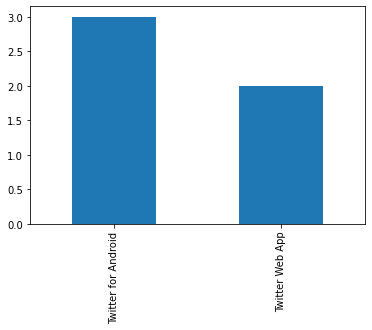

In [4]:
pd.value_counts(tweets_df['source']).plot.bar()

<AxesSubplot:>

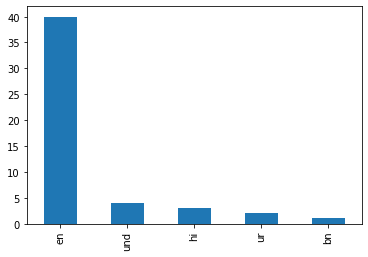

In [8]:
pd.value_counts(tweets_df['lang']).plot.bar()

<AxesSubplot:ylabel='user_verified'>

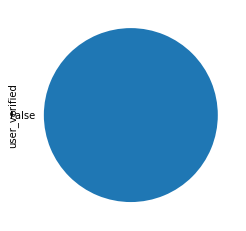

In [13]:
pd.value_counts(tweets_df['user_verified']).plot.pie()

<AxesSubplot:ylabel='Density'>

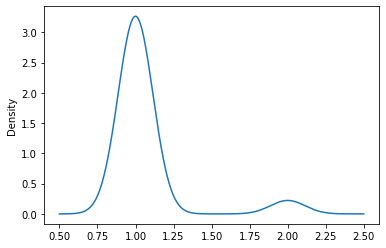

In [11]:
pd.value_counts(tweets_df['date']).plot.density()